In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from matplotlib import animation
%matplotlib inline

In [72]:
train_set, train_labels = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')
test_set, test_labels = loadlocal_mnist(
        images_path='t10k-images.idx3-ubyte',
        labels_path='t10k-labels.idx1-ubyte')

In [91]:
def unit_activation(vector, W_train):
    local_field = W_train.dot(vector.reshape(784, 1))
    output = np.zeros(shape=(10, 1))
    output[local_field.argmax()] = 1
    return output

def calculate_errors(X_train, Y_train, W_train):
    errors = 0
    for vector, label in zip(X_train, Y_train):
        local_field = W_train.dot(vector.reshape(784, 1))
        if (local_field.argmax() != label):
            errors += 1
    return errors

def assign_experiment_3(n, eta, epsilon):
    X_train = train_set[:n, :]
    Y_train = train_labels[:n]
    W_train = np.random.randn(10, 784)
    epoch = 0
    errors = []
    while (True):
        errors.append(calculate_errors(X_train, Y_train, W_train))
        print('epoch: {}, errors: {}'.format(epoch, errors[-1]))
        if (errors[-1]/n <= epsilon):
            break
        for vector, label in zip(X_train, Y_train):
            label_vector = np.zeros(shape=(10, 1))
            label_vector[label] = 1
            W_train = W_train + eta*(label_vector - unit_activation(vector, W_train)).dot(vector.reshape(1, 784))
        epoch += 1
    
    #real_time = animation.FuncAnimation(plt.gcf(), animate, fargs=errors, interval=100)
    plt.plot([i for i in range(0, epoch + 1)], errors, 'r')
    plt.show()
    
    test_errors = calculate_errors(test_set, test_labels, W_train)
    print((test_errors/test_set.shape[0]) * 100)

epoch: 0, errors: 46
epoch: 1, errors: 9
epoch: 2, errors: 13
epoch: 3, errors: 13
epoch: 4, errors: 2
epoch: 5, errors: 6
epoch: 6, errors: 0


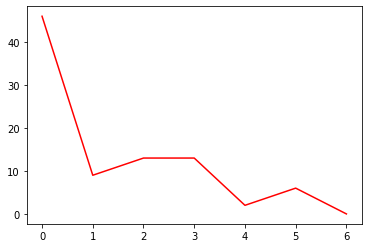

42.480000000000004


In [92]:
assign_experiment_3(n=50, eta=1, epsilon=0)

epoch: 0, errors: 895
epoch: 1, errors: 276
epoch: 2, errors: 146
epoch: 3, errors: 197
epoch: 4, errors: 72
epoch: 5, errors: 98
epoch: 6, errors: 95
epoch: 7, errors: 48
epoch: 8, errors: 20
epoch: 9, errors: 46
epoch: 10, errors: 55
epoch: 11, errors: 38
epoch: 12, errors: 48
epoch: 13, errors: 24
epoch: 14, errors: 5
epoch: 15, errors: 11
epoch: 16, errors: 3
epoch: 17, errors: 69
epoch: 18, errors: 27
epoch: 19, errors: 1
epoch: 20, errors: 4
epoch: 21, errors: 5
epoch: 22, errors: 8
epoch: 23, errors: 1
epoch: 24, errors: 1
epoch: 25, errors: 5
epoch: 26, errors: 5
epoch: 27, errors: 6
epoch: 28, errors: 1
epoch: 29, errors: 4
epoch: 30, errors: 1
epoch: 31, errors: 0


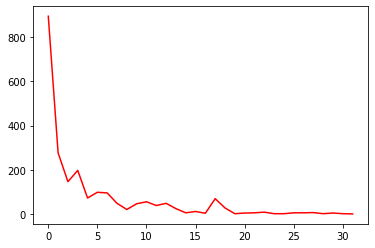

16.2


In [93]:
assign_experiment_3(n=1000, eta=1, epsilon=0)

epoch: 0, errors: 50489
epoch: 1, errors: 7670
epoch: 2, errors: 7323
epoch: 3, errors: 7108
epoch: 4, errors: 7524
epoch: 5, errors: 8532
epoch: 6, errors: 6794
epoch: 7, errors: 6811
epoch: 8, errors: 8047
epoch: 9, errors: 7805
epoch: 10, errors: 7805
epoch: 11, errors: 7597
epoch: 12, errors: 6874
epoch: 13, errors: 6700
epoch: 14, errors: 8141
epoch: 15, errors: 6700
epoch: 16, errors: 7027
epoch: 17, errors: 6845
epoch: 18, errors: 8426
epoch: 19, errors: 8198
epoch: 20, errors: 8143
epoch: 21, errors: 6711
epoch: 22, errors: 6301


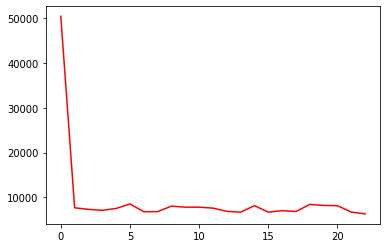

11.540000000000001


In [96]:
assign_experiment_3(n=60000, eta=1, epsilon=0.11)

Question (i) to be done